## 1. Regresión lineal con mínimos cuadrados

Implementaremos la forma matricial de la regresión lineal con el método de los mínimos cuadrados. 

Los valores de los pesos $\widehat{w}$ vienen dados por:

$$
\widehat{w}=(X^TX)^{-1}X^Ty
$$


Donde $y$ es la variable a predecir y $X$ la matriz de features. Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/).

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Vemos las primeras filas del dataset.

In [2]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [3]:
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


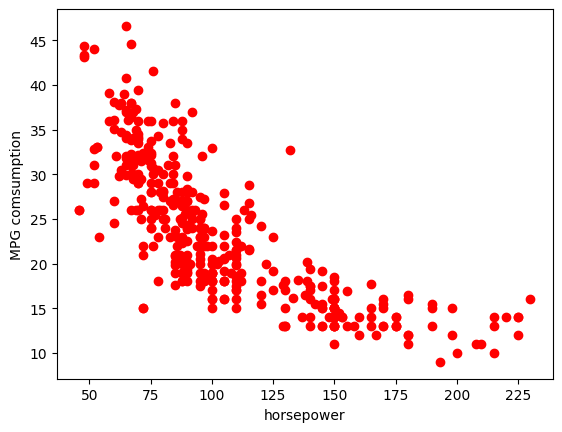

In [5]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    """
    Función que recibe los dataframes de features y de target y el nombre de la variable y grafica el target 
    (consumo en galones por milla) vs la variable que le ha llegado por parámetro.
    """
    plt.scatter(X[nombre_columna], y, color='red')
    plt.ylabel('MPG comsumption')
    plt.xlabel(nombre_columna)

visualiza(X, y, 'horsepower')

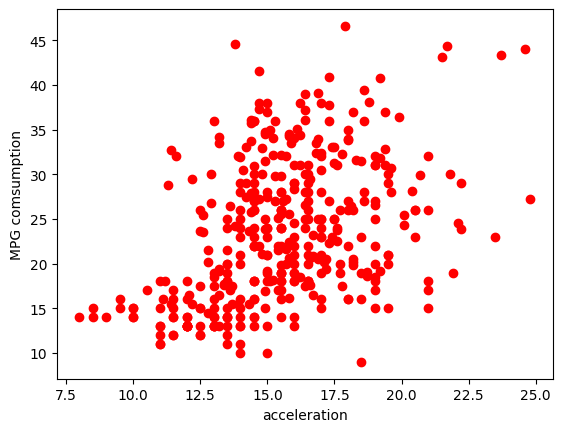

In [6]:
visualiza(X, y, 'acceleration')

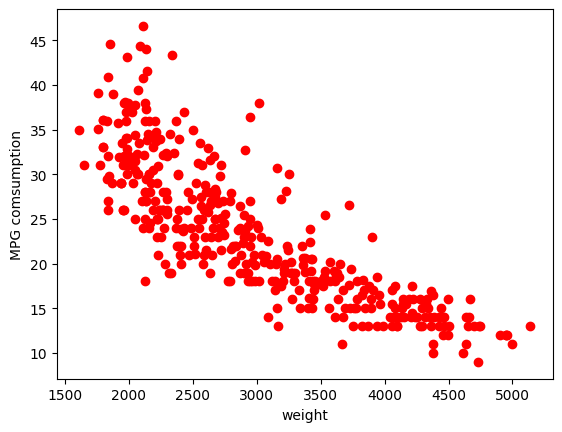

In [7]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

Lo primero, implementa una . Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [8]:
import numpy as np

def pesos_ols(X, y):
    """
    Función que devuelve los valores de $\widehat{w}$ dados X e y. 
    Si  el dataset tiene más features que observaciones, lo trasponemos antes de realizar las operaciones.
    """
    
    # Comprobamos que las dimensiones son adecuadas y corrige si no es así
    if y.ndim<2:
        y=np.array([y])
    if X.ndim<2:
        X=np.array([X])
    number_of_observations=max(y.shape[0],y.shape[1])
    if y.shape[1]!=1:
        y=np.transpose(y)
    if X.shape[0]!=number_of_observations:
        X=np.transpose(X)
        
        
    # Aseguramos la forma adecuada para aplicar la fórmula
    
    ones = np.ones((len(X),1))
    X_b = np.concatenate((ones, X), axis = 1)
    X_bt = np.transpose(X_b)

    
    # Cálculo de pesos
    
    number_of_features=X.shape[1]
    
    if number_of_features<number_of_observations:
        w=np.linalg.pinv(np.dot(X_bt, X_b)).dot(X_bt).dot(y)
    else:
        w=np.linalg.pinv(np.dot(X_b, X_bt)).dot(X_b).dot(y)
    
    return w

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Lucia\AppData\Local\Temp\ipykernel_30232\1343558420.py:4: SyntaxWarning: invalid escape sequence '\w'
  """


In [9]:
X_example = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_example = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_example, y_example)


array([[-2.29223802e+06],
       [ 5.92536529e+01],
       [ 1.20780450e+03]])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibujamos de nuevo los datos junto con la recta obtenida, en la misma gráfica. Para ello, convertimos los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

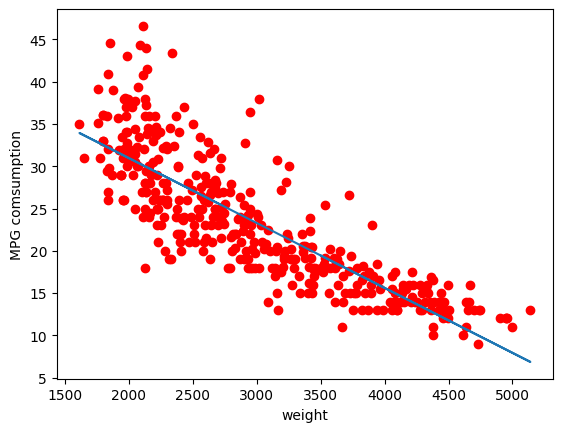

In [10]:
# Aplicación del modelo y dibujo de la recta junto con los datos
weight=np.array(X['weight'])
mpg=np.array(y)
w=pesos_ols(weight,mpg)

visualiza(X, y, 'weight')
plt.plot(weight,w[0]+w[1]*weight)

Por último, vamos a comparar el resultado con el que nos da [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para comprobar nuestra implementación.

In [13]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


In [16]:
w_sklearn=np.array([lr.intercept_,lr.coef_[0]])
np.isclose(w,w_sklearn)


array([[ True],
       [ True]])

Los resultados obtenidos con sklearn son los mismos.

### 1.4 Comparación del método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



El método de mínimos cuadrados minimiza la suma del cuadrado de las distancias verticales entre las respuestas observadas en la muestra y las respuestas del modelo. Los coeficientes se obtienen con la siguiente fórmula.

$W'=(X^{T}X)^{-1}X^{T}y$
    
Donde la matrix $X$ viene definida como:

$
  X =
  \left[ {\begin{array}{cc}
   1 & x_{11} & ... & x_{1d} \\
   1 & x_{21} & ... & x_{2d} \\
   ... & ... & ... & ... \\
   1 & x_{nd} & ... & x_{nd} \\
  \end{array} } \right]
$

donde cada valor de $x_{ij}$ es el valor de la la observación $i$ de la variable independiente $j$, y donde $y$ es la matriz columna de valores los $n$ valores observados de la variable dependiente.

El método de mínimos cuadrados del apartado no es escalable en problemas complejos, para los cuales resulta adecuado aplicar métodos de optimización como el descenso de gradiente.

Aplicado a una regresión lineal, el método de descenso de gradiente consiste en minimizar el Residual Sum Squares (RSS). Itera sus coeficientes con el gradiente de RSS:

Iteración de la intersección:
$$w_0^{t+1} = w_0^t - \eta \cdot \frac{\partial f}{\partial w_0}$$

Iteración de la pendiente:
$$w_1^{t+1} = w_1^t - \eta \cdot \frac{\partial f}{\partial w_1}$$

Donde los subíndices indican el índice del vector w y los superíndices la iteración en la que estamos.

## 2. Optimización con descenso del gradiente

Resolvemos el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

El RSS también se puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función 

La función nos d.

In [17]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 

    """
    Parámetros de la función:

        - La entrada X y salida y de la regresión
        - Un punto inicial desde el que empezar a iterar
        - El número de iteraciones 
        - El learning rate
    Devuelve un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo (loss function)

    """

    loss_iter = [np.inf]
    w = [w0]
    w_iter = w0
    

    if y.ndim<2:
        y=np.array([y])
    if X.ndim<2:
        X=np.array([X])
    number_of_observations=max(y.shape[0],y.shape[1])
    if y.shape[1]!=1:
        y=np.transpose(y)
    if X.shape[0]!=number_of_observations:
        X=np.transpose(X)
           
    
    ones = np.ones((len(X),1))
    X_ones = np.concatenate((ones, X), axis = 1)


    for i in range(n_iter):
        
        #Valor de y estimado
        y_hat = np.dot(X_ones, w_iter)
        
        #Residuo:
        error = (y_hat - y)
        
        #RSS a minimizar (*1/2 para simplificar la optimizacion.
        #La constante 1/2 no afecta el punto en el que la RSS alcanza su mínimo, pero simplifica la optimización
        rss_iter = (1/2)*np.dot(error.T, error) # 1/2 * (y_hat - y)^2
        
        #Gradiente de RSS
        grad_rss = np.dot(X_ones.T, error) 

        #Acercamiento iterativo al minimo de RSS
        w_iter = w_iter - eta*grad_rss # suma vectorial
        
        #Registro de iteraciones
        w.append(w_iter)

        #Registro de RSS
        loss_iter.append(rss_iter[0,0])
        
    
    return np.array(w), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])
print(loss[-1])

[[183845.82320222]
 [ 40415.66453324]]
2225883115.6422315


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

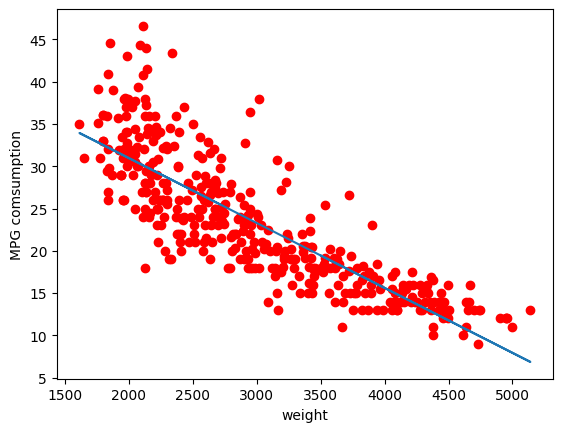

In [19]:
# Aplicamos el modelo y dibujamos la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

#Punto inicial:
np.random.seed(1234)
w0 = np.random.rand(2).reshape((2,1))
#Learning rate:
eta = 0.001 

# Aplicamos el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, 5000, eta)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# gráfica
visualiza(X_gd, y_gd, 'weight')
plt.plot(X_np,weights[-1][0]+weights[-1][1]*X_gd)